In [1]:
import numpy as np
import matplotlib.pyplot as plt

from branchcut.exampleCreator import createExample, createUnwrappedBaseline, TrueBranchCuts
from branchcut.unwrap import *
from branchcut.setup import find_residues, create_mask

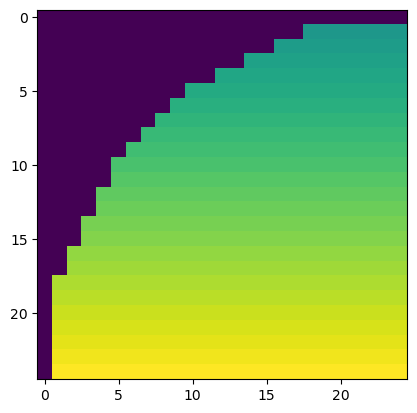

In [59]:
plt.imshow((_mask*phase_baseline)[25:50,25:50])

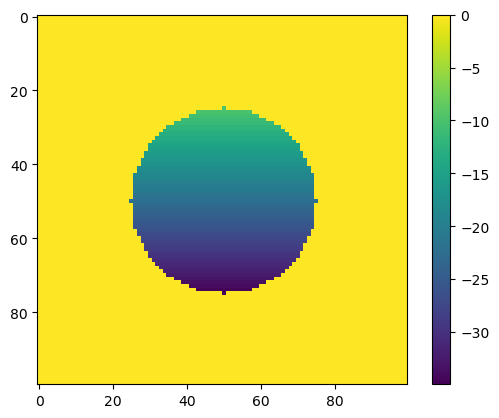

In [63]:
plt.imshow(add)
plt.colorbar()

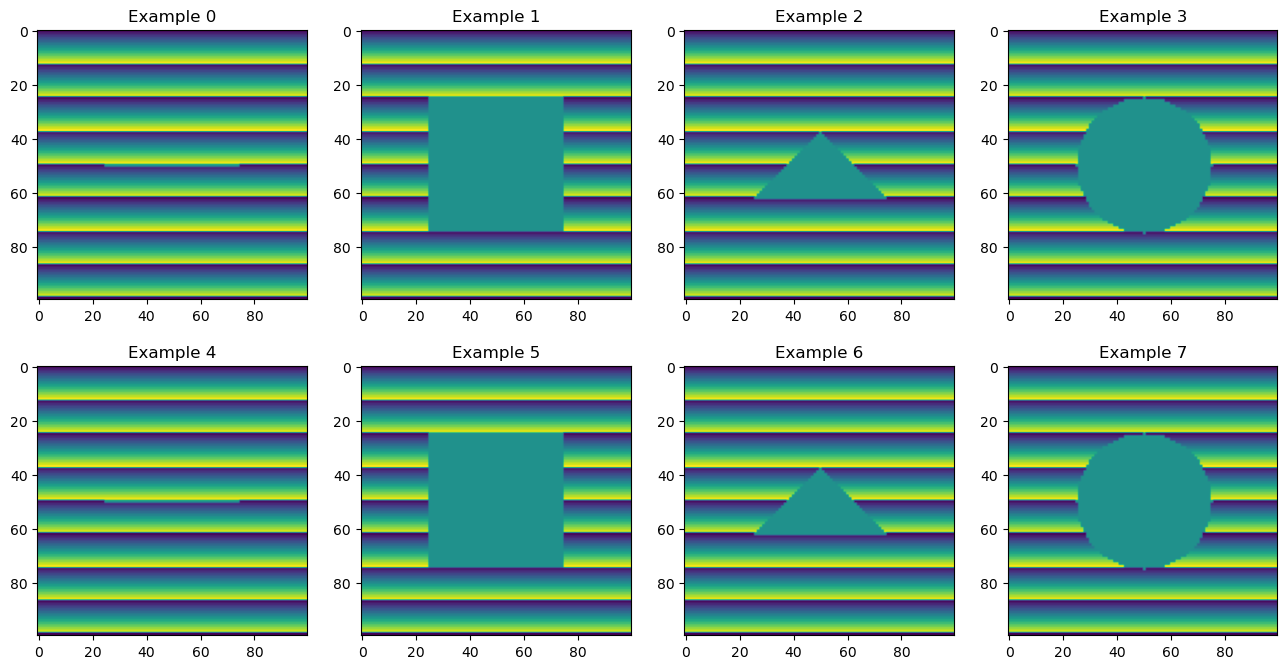

In [ ]:
SIZE = (100,100)
minmax = [(0, 2*np.pi),
          (0, 4*np.pi),
          (0, 8*np.pi),
          (0, 16*np.pi),
         ]
phase_baseline_8 = createUnwrappedBaseline(SIZE, minmax, format='vertical')
phase_baseline_1
phase_baseline_

mask = [create_mask(SIZE,loc=[50,50], shape='line', percent=False),
        create_mask(SIZE,loc=[50,50], shape='square', percent=False),
        create_mask(SIZE,loc=[50,50], shape='triangle', percent=False),
        create_mask(SIZE,loc=[50,50], shape='circle', percent=False),
        create_mask(SIZE,loc=[50,50], shape='line', percent=False),
        create_mask(SIZE,loc=[50,50], shape='square', percent=False),
        create_mask(SIZE,loc=[50,50], shape='triangle', percent=False),
        create_mask(SIZE,loc=[50,50], shape='circle', percent=False),
       ]

phase = []
for _mask in mask:
    add = -1*_mask*phase_baseline + _mask*
    phase.append(createExample(phase_baseline, add_image=add, add_first=True))


fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i}')
    pax.imshow(phase[i][1])


In [ ]:

fig, ax = plt.subplots(2,3, figsize=(12,8))
pax = ax.flatten()[0]
pax.set_title('unwrapped phase')
pax.imshow(phase_unwrapped)

pax = ax.flatten()[1]
pax.set_title('wrapped phase')
pax.imshow(phase_wrapped)

pax = ax.flatten()[2]
pax.set_title('Residues')
pax.imshow(find_residues(phase_wrapped))

phase_unwrapped_func = unwrap(phase_wrapped,seed=(0,0), mode='dfs')
TBC = TrueBranchCuts(phase_unwrapped)
phase_unwrapped_func_B = unwrap(phase_wrapped,seed=(0,0),branchCuts=TBC, mode='dfs', unwrapBranchPixels=True)

pax = ax.flatten()[3]
pax.set_title('Unwrapped with seed (0,0)')
pax.imshow(phase_unwrapped_func)

pax = ax.flatten()[4]
pax.set_title('Estimated true branch cuts')
pax.imshow(TBC)

pax = ax.flatten()[5]
pax.set_title('unwrap w. estimated TBC')
pax.imshow(phase_unwrapped_func_B)


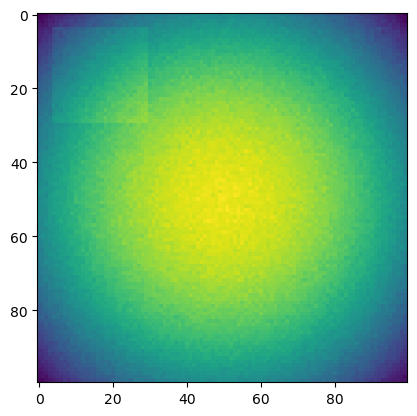

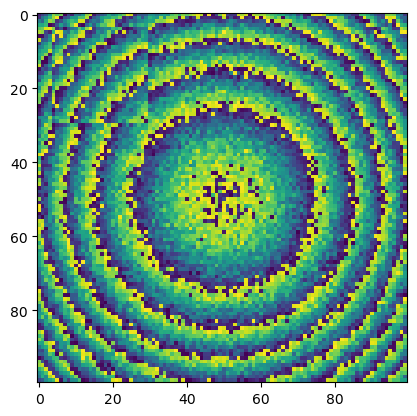

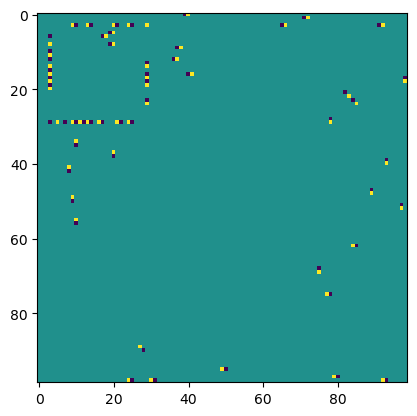

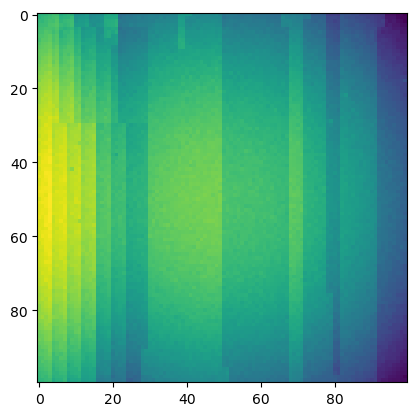

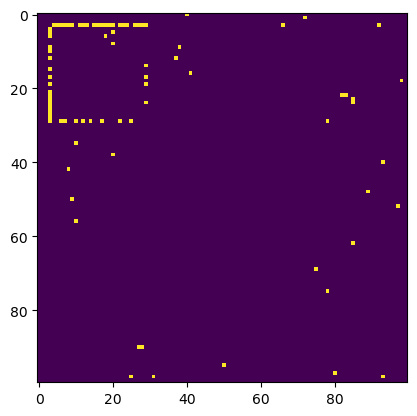

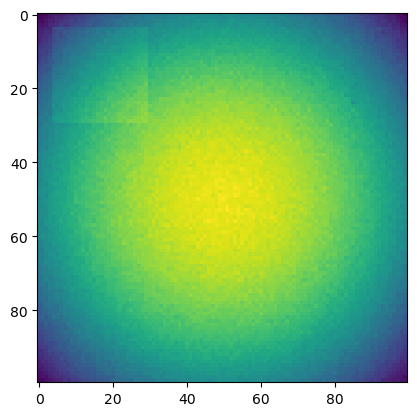

In [3]:
SIZE = (100,100)
MINPHASE = 0
MAXPHASE = 16*np.pi
phase_baseline = createUnwrappedBaseline(SIZE, (MINPHASE,MAXPHASE), format='parabola_peak')

square1 = np.zeros(SIZE)
square1[4:30,4:30] = 0.9*np.pi

square2 = np.ones(SIZE)
square2[4:30,4:30] = 1

phase_unwrapped, phase_wrapped = createExample(phase_baseline, add_image=square1, mult_image=square2, noise_sigma=0.2*np.pi, add_first=False)
plt.figure()
plt.imshow(phase_unwrapped)

plt.figure()
plt.imshow(phase_wrapped)

plt.figure()
plt.imshow(find_residues(phase_wrapped))

phase_unwrapped_func = unwrap(phase_wrapped,seed=(0,0), mode='dfs')
plt.figure()
plt.imshow(phase_unwrapped_func)

TBC = TrueBranchCuts(phase_unwrapped)
plt.figure()
plt.imshow(TBC)

phase_unwrapped_func_B = unwrap(phase_wrapped,seed=(0,0),branchCuts=TBC, mode='dfs')
plt.figure()
plt.imshow(phase_unwrapped_func_B)